In [28]:
# Import library dasar
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = (8, 6)

In [16]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IuFtZkpGhclN4b9Aicxq9Kqv8xU9xyIr')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [19]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)

In [38]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [22]:


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
print("",X.shape)
print("",y.shape)

 (569, 30)
 (569,)


In [23]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)


print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (398, 30)
Ukuran X_test: (171, 30)
Ukuran y_train: (398,)
Ukuran y_test: (171,)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[-0.12348985, -0.29680142, -0.17050713, -0.20861569, -1.2016799 ,
        -0.7731696 , -0.76231194, -0.93324109, -1.22994935, -0.94816603,
        -0.53359339, -0.86028757, -0.61678096, -0.39177533, -1.35556152,
        -0.52503193, -0.4817033 , -0.97940018, -0.88459317, -0.68548672,
        -0.19761978, -0.5067476 , -0.30791001, -0.27357592, -1.50742388,
        -0.44926047, -0.57223884, -0.84082156, -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, -0.2965028 , -1.80463697,
        -0.58761605, -0.09198533, -0.54268359, -1.41998468, -0.61249143,
        -0.83040055, -0.12266723, -0.78254381, -0.53126109, -0.36490698,
         0.40861926,  0.57668457, -0.2482875 , -1.03572382,  0.10768859,
        -0.42291745, -0.45849468, -0.4652873 , -0.43812681, -1.27301714,
         0.02704209,  0.31804488, -0.37706655, -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, -0.01024193,  0.5191843 ,
         1.57000613,  0.73231958,  0.38658307,  1

In [26]:
svm_no_pca = SVC(random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)

# Prediction and Evaluation
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
report_no_pca = classification_report(y_test, y_pred_no_pca, target_names=le.classes_)


print(f"Akurasi Model Tanpa PCA: {accuracy_no_pca:.4f}")
print("Laporan Klasifikasi Model Tanpa PCA:")
print(report_no_pca)

Akurasi Model Tanpa PCA: 0.9766
Laporan Klasifikasi Model Tanpa PCA:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [33]:
pca = PCA(n_components=3) # Selects components that explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

n_components = pca.n_components_
print(f"Jumlah komponen PCA yang dipilih untuk 95% variansi: {n_components}")

# Train SVM on PCA-transformed data
svm_with_pca = SVC(random_state=42)
svm_with_pca.fit(X_train_pca, y_train)

# Prediction and Evaluation
y_pred_with_pca = svm_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
report_with_pca = classification_report(y_test, y_pred_with_pca, target_names=le.classes_)

print(f"Akurasi Model Dengan PCA: {accuracy_with_pca:.4f}")
print("Laporan Klasifikasi Model Dengan PCA:")
print(report_with_pca)

Jumlah komponen PCA yang dipilih untuk 95% variansi: 3
Akurasi Model Dengan PCA: 0.9298
Laporan Klasifikasi Model Dengan PCA:
              precision    recall  f1-score   support

           B       0.94      0.94      0.94       108
           M       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [32]:
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio untuk Setiap Komponen PCA:", explained_var)
print("Total variansi yang dijelaskan :", explained_var.sum())

Explained Variance Ratio untuk Setiap Komponen PCA: [0.4316748  0.19845652 0.09733159]
Total variansi yang dijelaskan : 0.7274629068739634


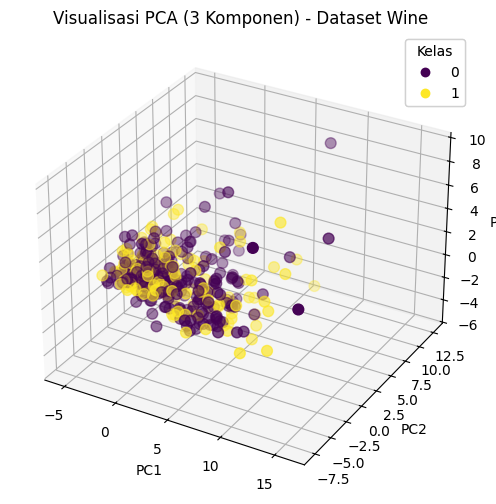

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(['tab:blue', 'tab:orange'])
scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_train,
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Dataset Wine')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend1)

plt.show()

In [42]:
comparison = pd.DataFrame({
    'Model': ['SVM Tanpa PCA', 'SVM Dengan PCA (3 Komponen)'],
    'Jumlah Fitur': [X_train_scaled.shape[1], X_train_pca.shape[1]],
    'Akurasi': [accuracy_no_pca, accuracy_with_pca],
    'Variansi Total PCA': [None, explained_var.sum()]
})

comparison

,Model,Jumlah Fitur,Akurasi,Variansi Total PCA
0,SVM Tanpa PCA,30,0.976608,NaN
1,SVM Dengan PCA (3 Komponen),3,0.929825,0.727463
